In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC                        
from sklearn.ensemble import RandomForestClassifier      
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [14]:

df = pd.read_csv("cleaned_spam_calldata.csv")


In [15]:
X = df[['len_number', 'startswith_140', 'startswith_91', 'isdigit']]
y = df['IsSpam']

KeyError: "None of [Index(['len_number', 'startswith_140', 'startswith_91', 'isdigit'], dtype='object')] are in the [columns]"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


✅ Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        28

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



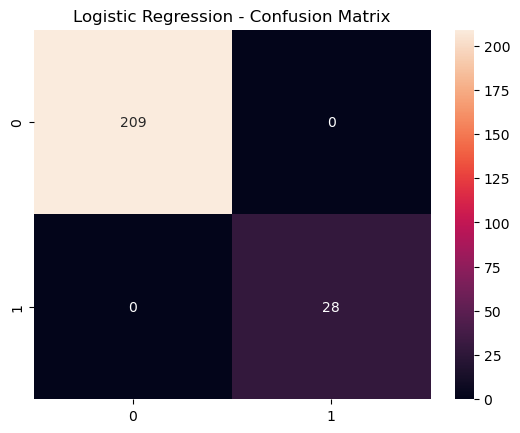

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

c:\Users\priya\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\priya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ Linear SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        28

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



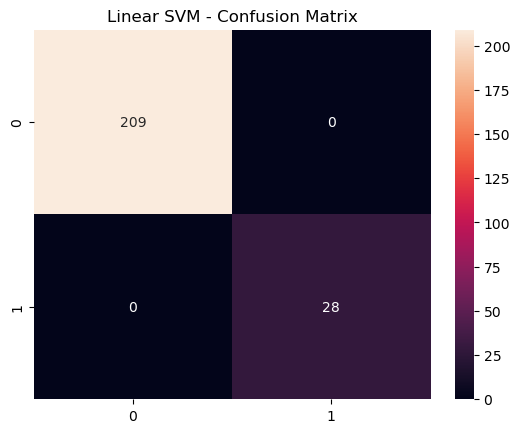

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("✅ Linear SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d')
plt.title("Linear SVM - Confusion Matrix")
plt.show()

✅ Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00        28

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



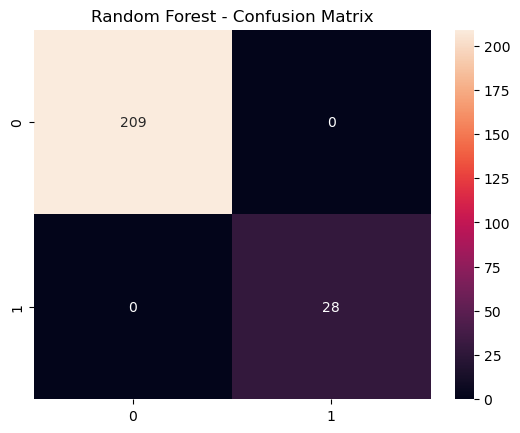

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("✅ Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [ ]:
joblib.dump(rf_model, 'call_spam_rf_model.pkl')

['call_spam_rf_model.pkl']

In [ ]:
model = joblib.load('call_spam_rf_model.pkl')

In [ ]:
new_calls = pd.DataFrame([
    [300, 10],
    [15, 50],
    [180, 5]
], columns=['CallDuration', 'CallFrequency'])


In [ ]:
predictions = model.predict(new_calls)

In [ ]:

for call, pred in zip(new_calls, predictions):
    print(f"📲 Call with Duration {call[0]}s and Frequency {call[1]} => Prediction: {'📛 Spam' if pred == 1 else '✅ Not Spam'}")

📲 Call with Duration Cs and Frequency a => Prediction: 📛 Spam
📲 Call with Duration Cs and Frequency a => Prediction: 📛 Spam
